# Distribuição de frequência

# EXERCÍCIO

O objetivo desta tarefa é aplicar a distribuição de frequência utilizando o atributo <b>age</b> da base de dados do censo

* Carregue a base de dados `census.csv`

* Faça testes utilizando o parâmetro <b>bins</b> para visualizar a distribuição dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv('CSVs/census.csv')
df_raw.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df = df_raw[['age']]
df.head()

,age
0,39
1,50
2,38
3,53
4,28


In [4]:
freq, classes = np.histogram(df, bins='sturges')
freq, classes, len(classes)

(array([3130, 4066, 3376, 4353, 3399, 3876, 2722, 2716, 1924, 1225,  917,
         389,  273,   96,   51,   48], dtype=int64),
 array([17.    , 21.5625, 26.125 , 30.6875, 35.25  , 39.8125, 44.375 ,
        48.9375, 53.5   , 58.0625, 62.625 , 67.1875, 71.75  , 76.3125,
        80.875 , 85.4375, 90.    ]),
 17)

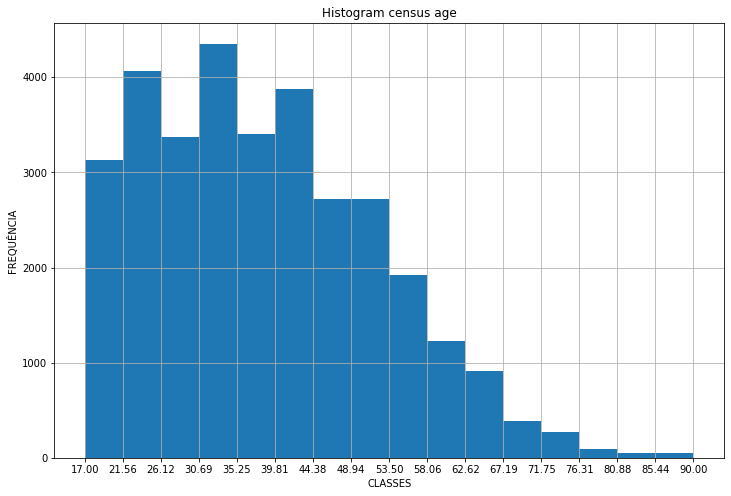

In [5]:
_, ax = plt.subplots(figsize=(12,8))
plt.hist(df['age'], classes)
plt.title('Histogram census age')
plt.xlabel('CLASSES')
plt.ylabel('FREQUÊNCIA')
ax.set_xticks(classes)
plt.grid();

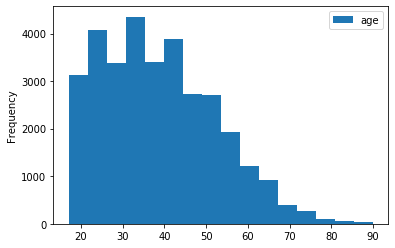

In [6]:
df.plot.hist(bins=classes);

In [7]:
freq, classes = np.histogram(df['age'])
freq, classes, len(classes)

(array([5570, 5890, 6048, 6163, 3967, 2591, 1595,  496,  174,   67],
       dtype=int64),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 11)

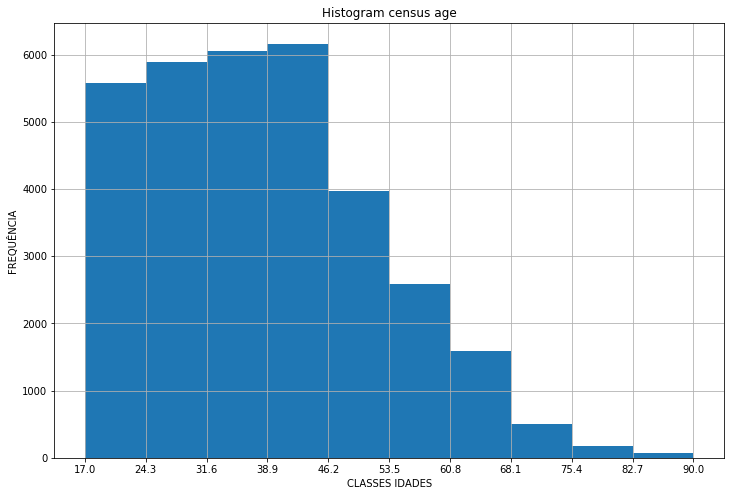

In [8]:
_, ax = plt.subplots(figsize=(12,8))
plt.hist(df['age'], classes)
plt.title('Histogram census age')
plt.xlabel('CLASSES IDADES')
plt.ylabel('FREQUÊNCIA')
ax.set_xticks(classes)
plt.grid();

In [9]:
classes = np.insert(classes, 0, classes[0] - (classes[1]-classes[0]))
classes

array([ 9.7, 17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7,
       90. ])

In [11]:
df['age'] = pd.cut(df['age'], bins=classes,
                  labels=['FAIXA1','FAIXA2','FAIXA3','FAIXA4','FAIXA5','FAIXA6','FAIXA7','FAIXA8','FAIXA9','FAIXA10','FAIXA11'])
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age
0,FAIXA5
1,FAIXA6
2,FAIXA4
3,FAIXA6
4,FAIXA3


In [12]:
df.isnull().sum()

age    0
dtype: int64